# Plot Setting

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.insert(0,str(ROOT_DIR))
from path import DATA_DIR
from utils import sample_based_pcc

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)


ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configure Matplotlib styles

mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})


In [3]:
cell_line = "MCF7"
for step_number in range(2, 10):
    # Load random sequential data
    env_name = f"ENV_FDA_MCF7_STEP{step_number}"
    random_data_file = DATA_DIR / f"result_2025/AlphaTherapy/{env_name}_random_sequential_data.csv"
    random_data = pd.read_csv(random_data_file)
    random_eff_rewards = random_data["Efficacy_reward"].to_numpy()
    random_synergy_rewards = random_data["Synergy_reward"].to_numpy()
    
    # Load AlphaTherapy sequential data
    AlphaTherapy_data_file = ROOT_DIR.parent / f"output/AlphaTherapy/ENV_FDA_MCF7_STEP{step_number}.csv"
    AlphaTherapy_data = pd.read_csv(AlphaTherapy_data_file, index_col=0)
    suggested_synergy_rewards = AlphaTherapy_data["synergy_score"].to_numpy()
    suggested_eff_rewards = AlphaTherapy_data["AB_score"].to_numpy()

    # Create figure and axes layout
    fig, axes = plt.subplots(2, 2, figsize=(6, 6), 
                             gridspec_kw={'width_ratios': [3, 0.5], 'height_ratios': [0.5, 3]})

    # Determine limits for scatter plots and histograms
    x_min = np.min(np.concatenate([random_eff_rewards, suggested_eff_rewards])) - 0.01
    x_max = np.max(np.concatenate([random_eff_rewards, suggested_eff_rewards])) + 0.01
    y_min = np.min(np.concatenate([random_synergy_rewards, suggested_synergy_rewards])) - 0.01
    y_max = np.max(np.concatenate([random_synergy_rewards, suggested_synergy_rewards])) + 0.01

    # Scatter plot for efficacy vs. synergy rewards
    axes[1, 0].scatter(random_eff_rewards, random_synergy_rewards, c='grey', s=8, alpha=0.5, 
                        label='random sequential therapy')
    axes[1, 0].scatter(suggested_eff_rewards, suggested_synergy_rewards, c='r', s=8, alpha=0.5, 
                        label='recommended sequential therapy')
    axes[1, 0].spines['right'].set_visible(False)
    axes[1, 0].spines['top'].set_visible(False)
    axes[1, 0].set_xlabel('Efficacy reward', fontsize=7)
    axes[1, 0].set_ylabel('Sequential synergy reward', fontsize=7)
    axes[1, 0].set_xlim([x_min, x_max])
    axes[1, 0].set_ylim([y_min, y_max])
    axes[1, 0].legend(loc=2, bbox_to_anchor=(1.0, 1.15), borderaxespad=0.)

    # KDE plot for synergy rewards (vertical)
    sns.kdeplot(random_synergy_rewards, fill=True, color="grey", vertical=True, linewidth=0, ax=axes[1, 1])
    axes[1, 1].spines['right'].set_visible(False)
    axes[1, 1].spines['top'].set_visible(False)
    axes[1, 1].spines['left'].set_visible(False)
    axes[1, 1].spines['bottom'].set_visible(False)
    axes[1, 1].set_ylim([y_min, y_max])
    axes[1, 1].get_xaxis().set_visible(False)
    axes[1, 1].get_yaxis().set_visible(False)

    # Highlight suggested synergy rewards
    for y_pos in suggested_synergy_rewards:
        axes[1, 1].axhline(y=y_pos, color='red', linewidth=0.1)

    # KDE plot for efficacy rewards (horizontal)
    sns.kdeplot(random_eff_rewards, fill=True, color="grey", linewidth=0, ax=axes[0, 0])
    axes[0, 0].spines['right'].set_visible(False)
    axes[0, 0].spines['top'].set_visible(False)
    axes[0, 0].spines['left'].set_visible(False)
    axes[0, 0].spines['bottom'].set_visible(False)
    axes[0, 0].set_xlim([x_min, x_max])
    axes[0, 0].get_xaxis().set_visible(False)
    axes[0, 0].get_yaxis().set_visible(False)

    # Highlight suggested efficacy rewards
    for x_pos in suggested_eff_rewards:
        axes[0, 0].axvline(x=x_pos, color='red', linewidth=0.1)

    # Hide axes in the empty top-right subplot
    axes[0, 1].spines['right'].set_visible(False)
    axes[0, 1].spines['top'].set_visible(False)
    axes[0, 1].spines['left'].set_visible(False)
    axes[0, 1].spines['bottom'].set_visible(False)
    axes[0, 1].get_xaxis().set_visible(False)
    axes[0, 1].get_yaxis().set_visible(False)

    # Adjust layout and save the figure
    plt.legend(loc='upper left', fontsize=7, frameon=False)
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    fig.savefig(DATA_DIR / f'result_2025/AlphaTherapy/Supplymentary_fig5_step{step_number}.png', 
                dpi=300, bbox_inches='tight')


/tmp/ipykernel_636753/1569869397.py:40: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(random_synergy_rewards, fill=True, color="grey", vertical=True, linewidth=0, ax=axes[1, 1])
/tmp/ipykernel_636753/1569869397.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=7, frameon=False)
/tmp/ipykernel_636753/1569869397.py:40: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(random_synergy_rewards, fill=True, color="grey", vertical=True, linewidth=0, ax=axes[1, 1])
/tmp/ipykernel_636753/1569869397.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start wit

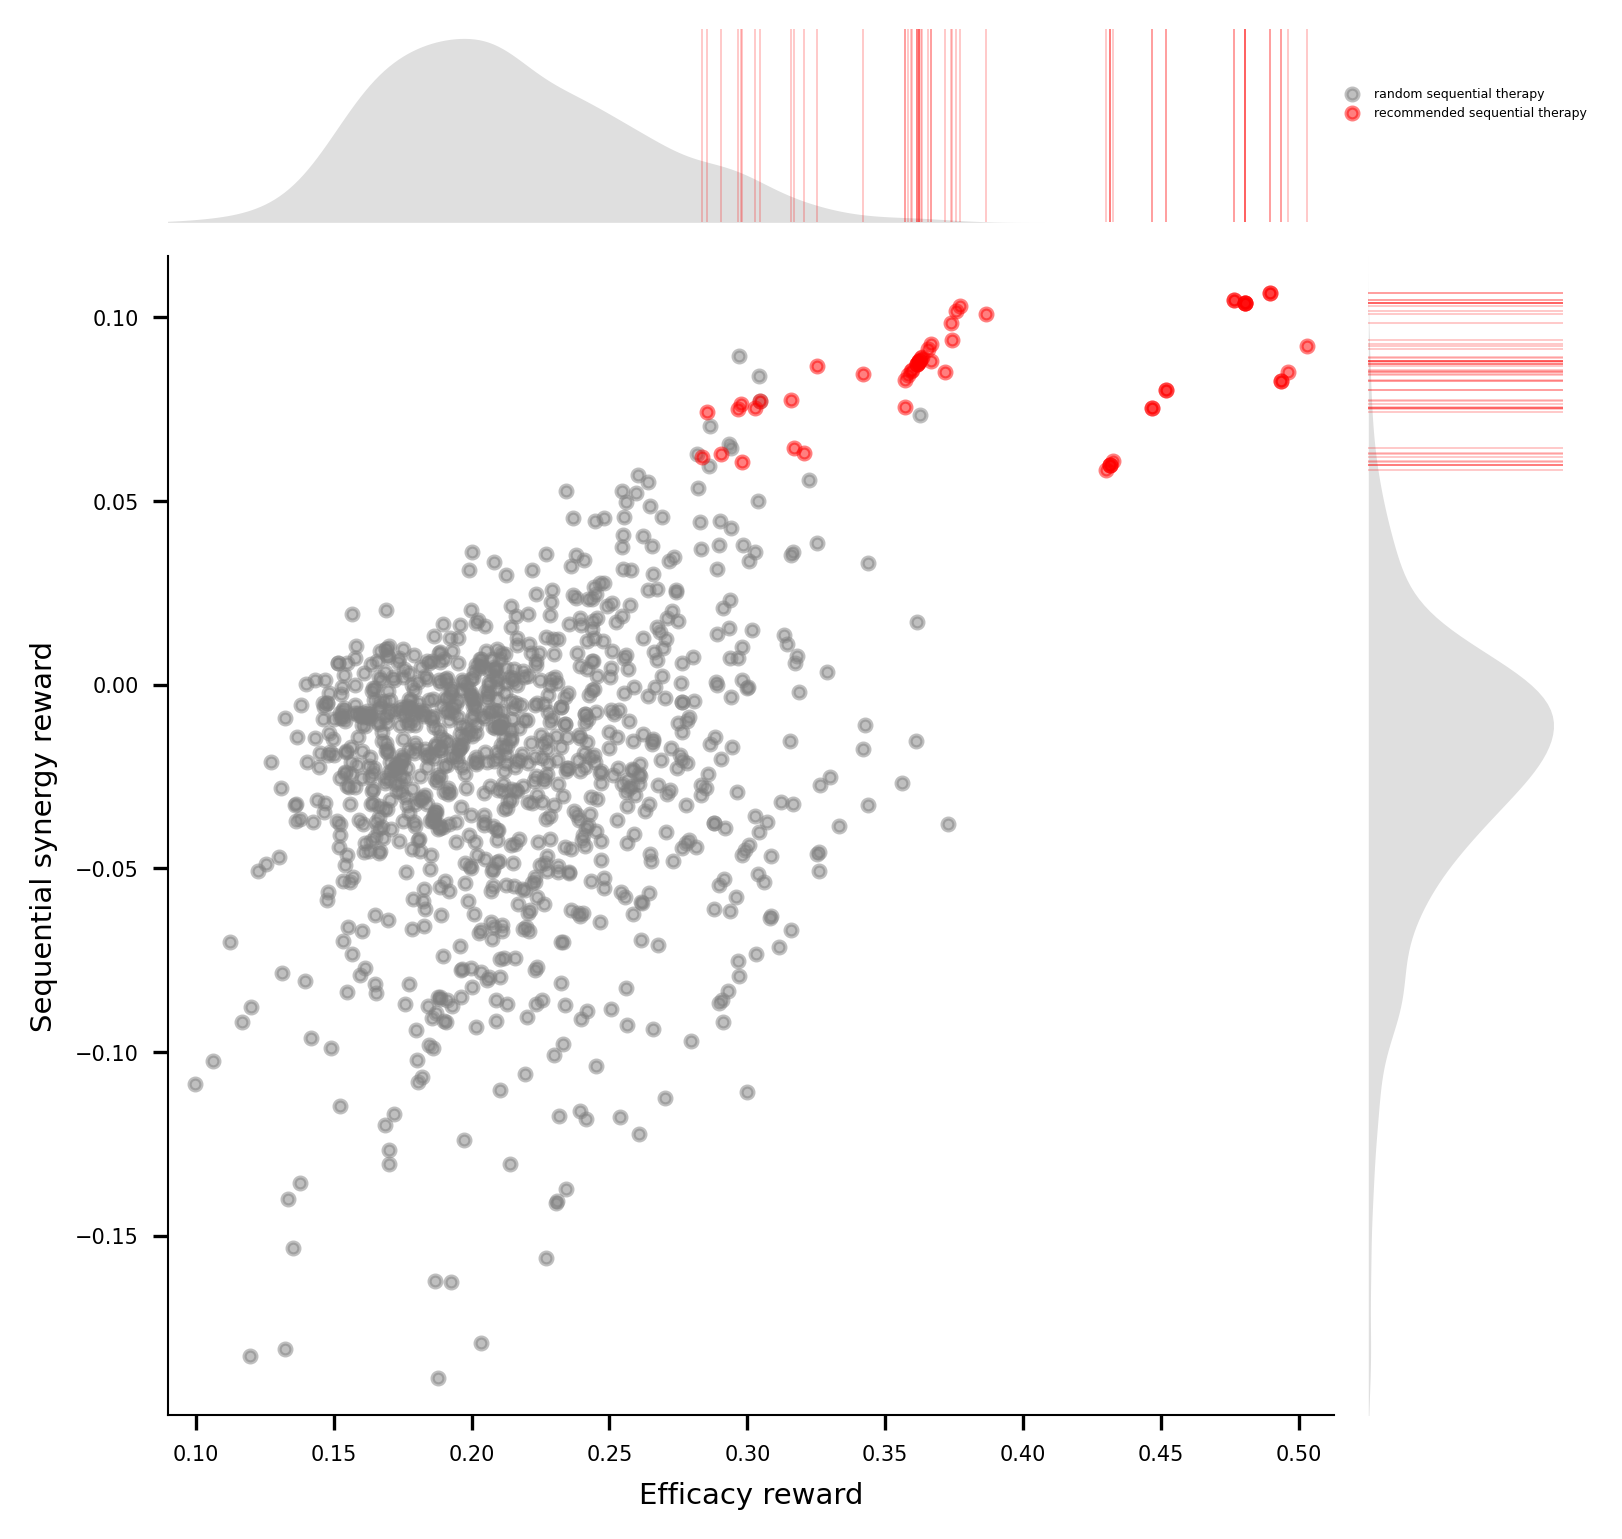

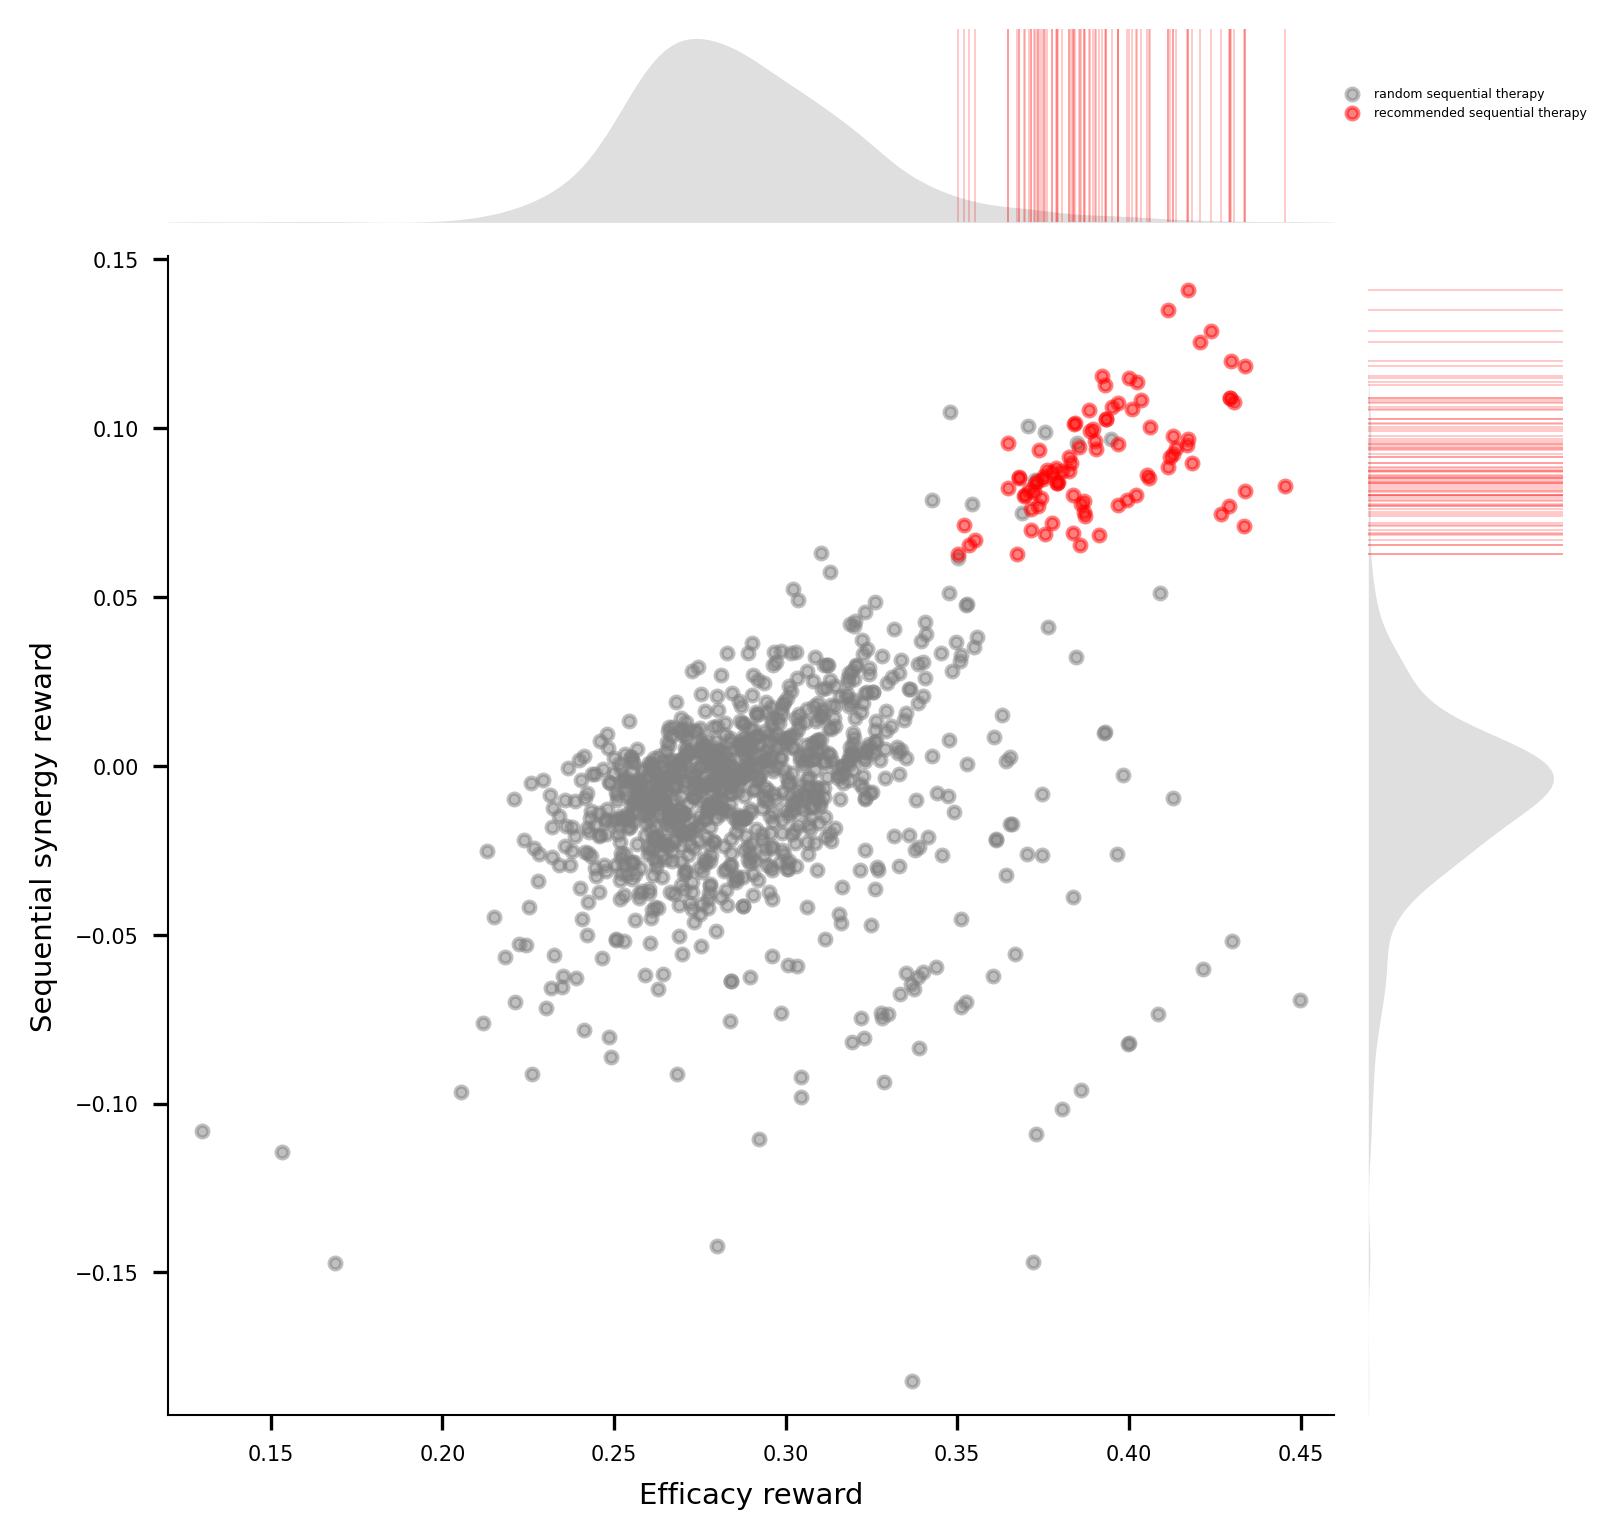

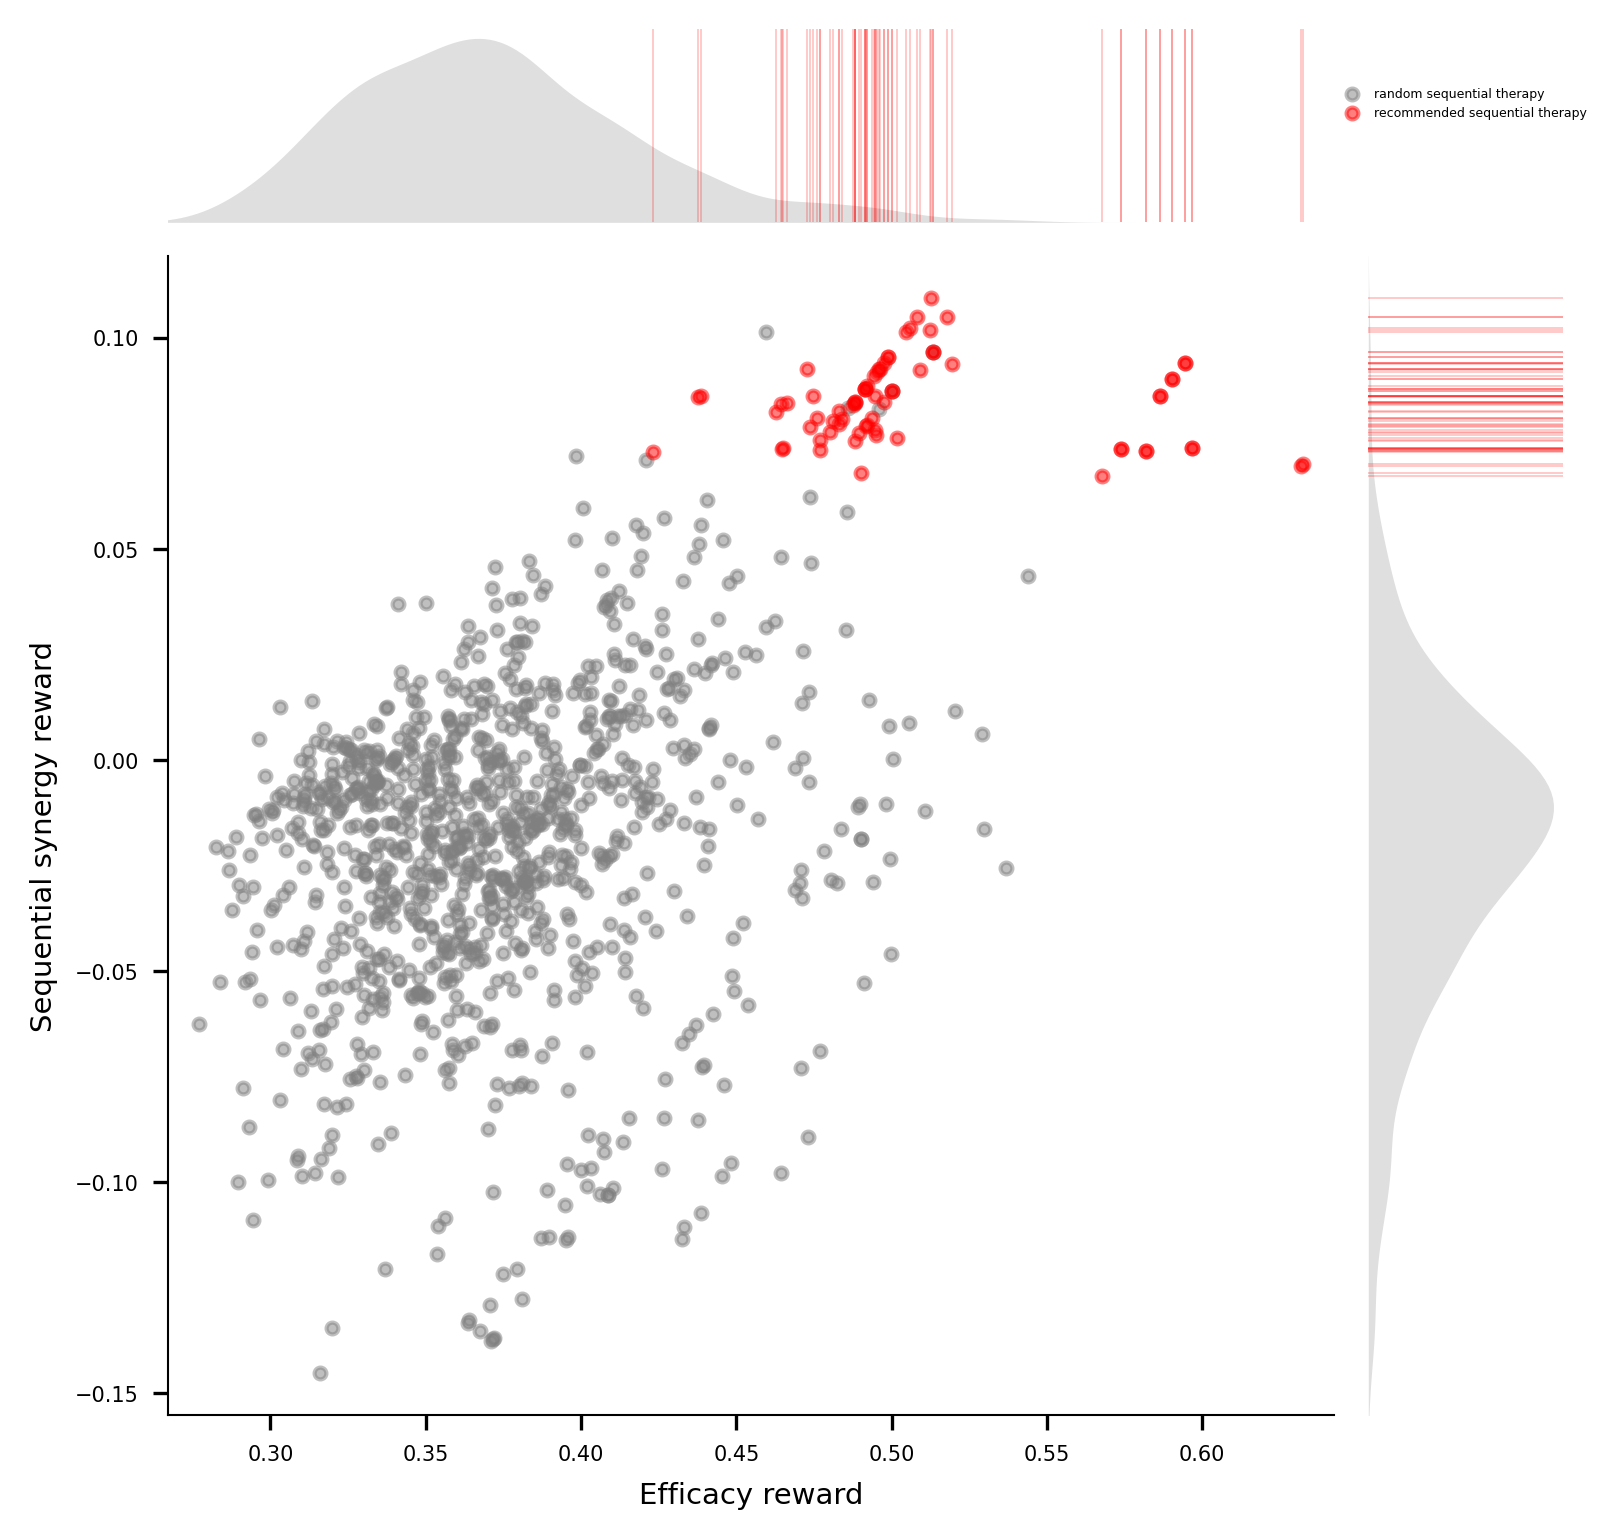

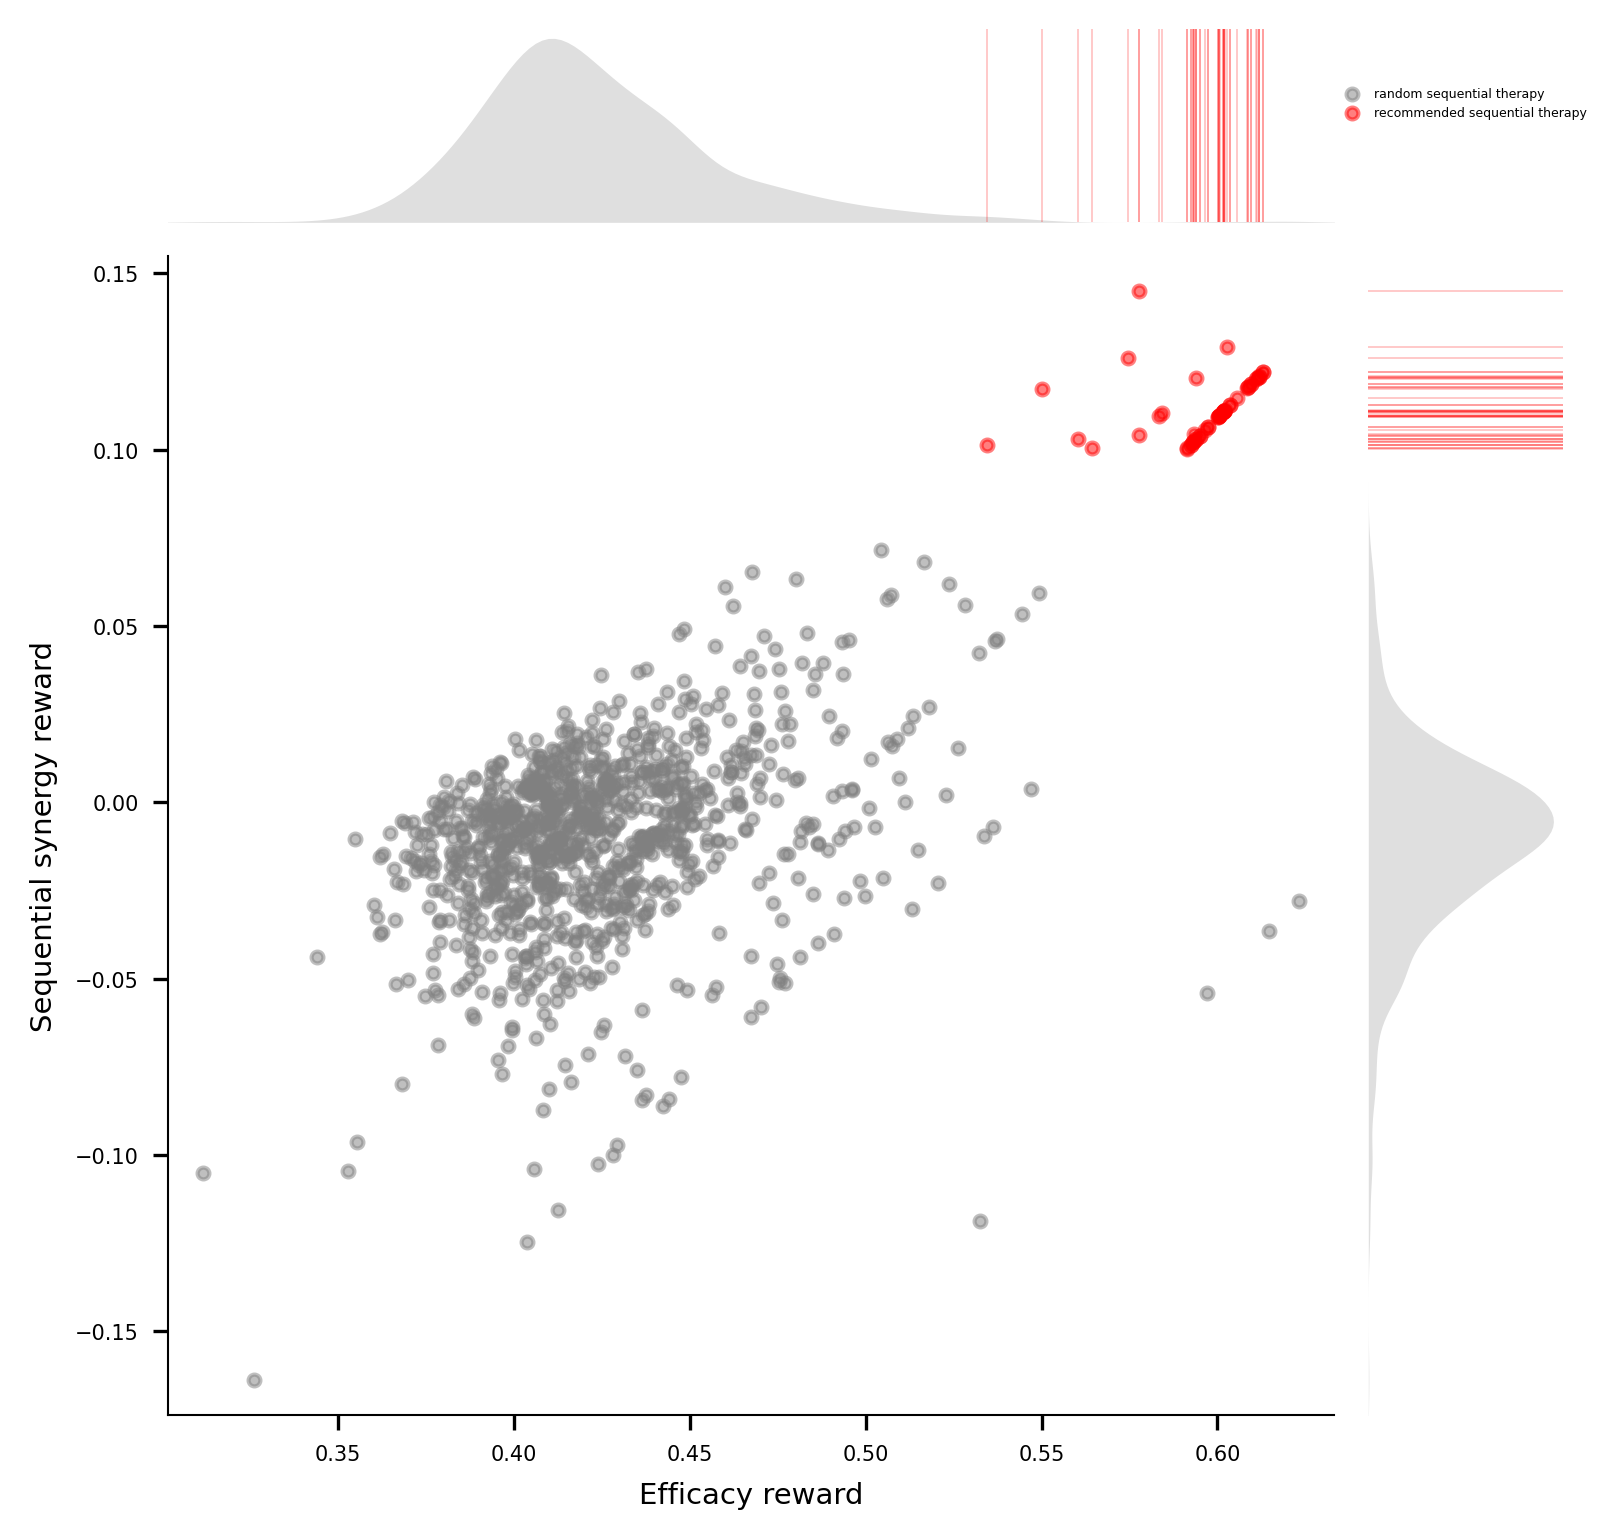

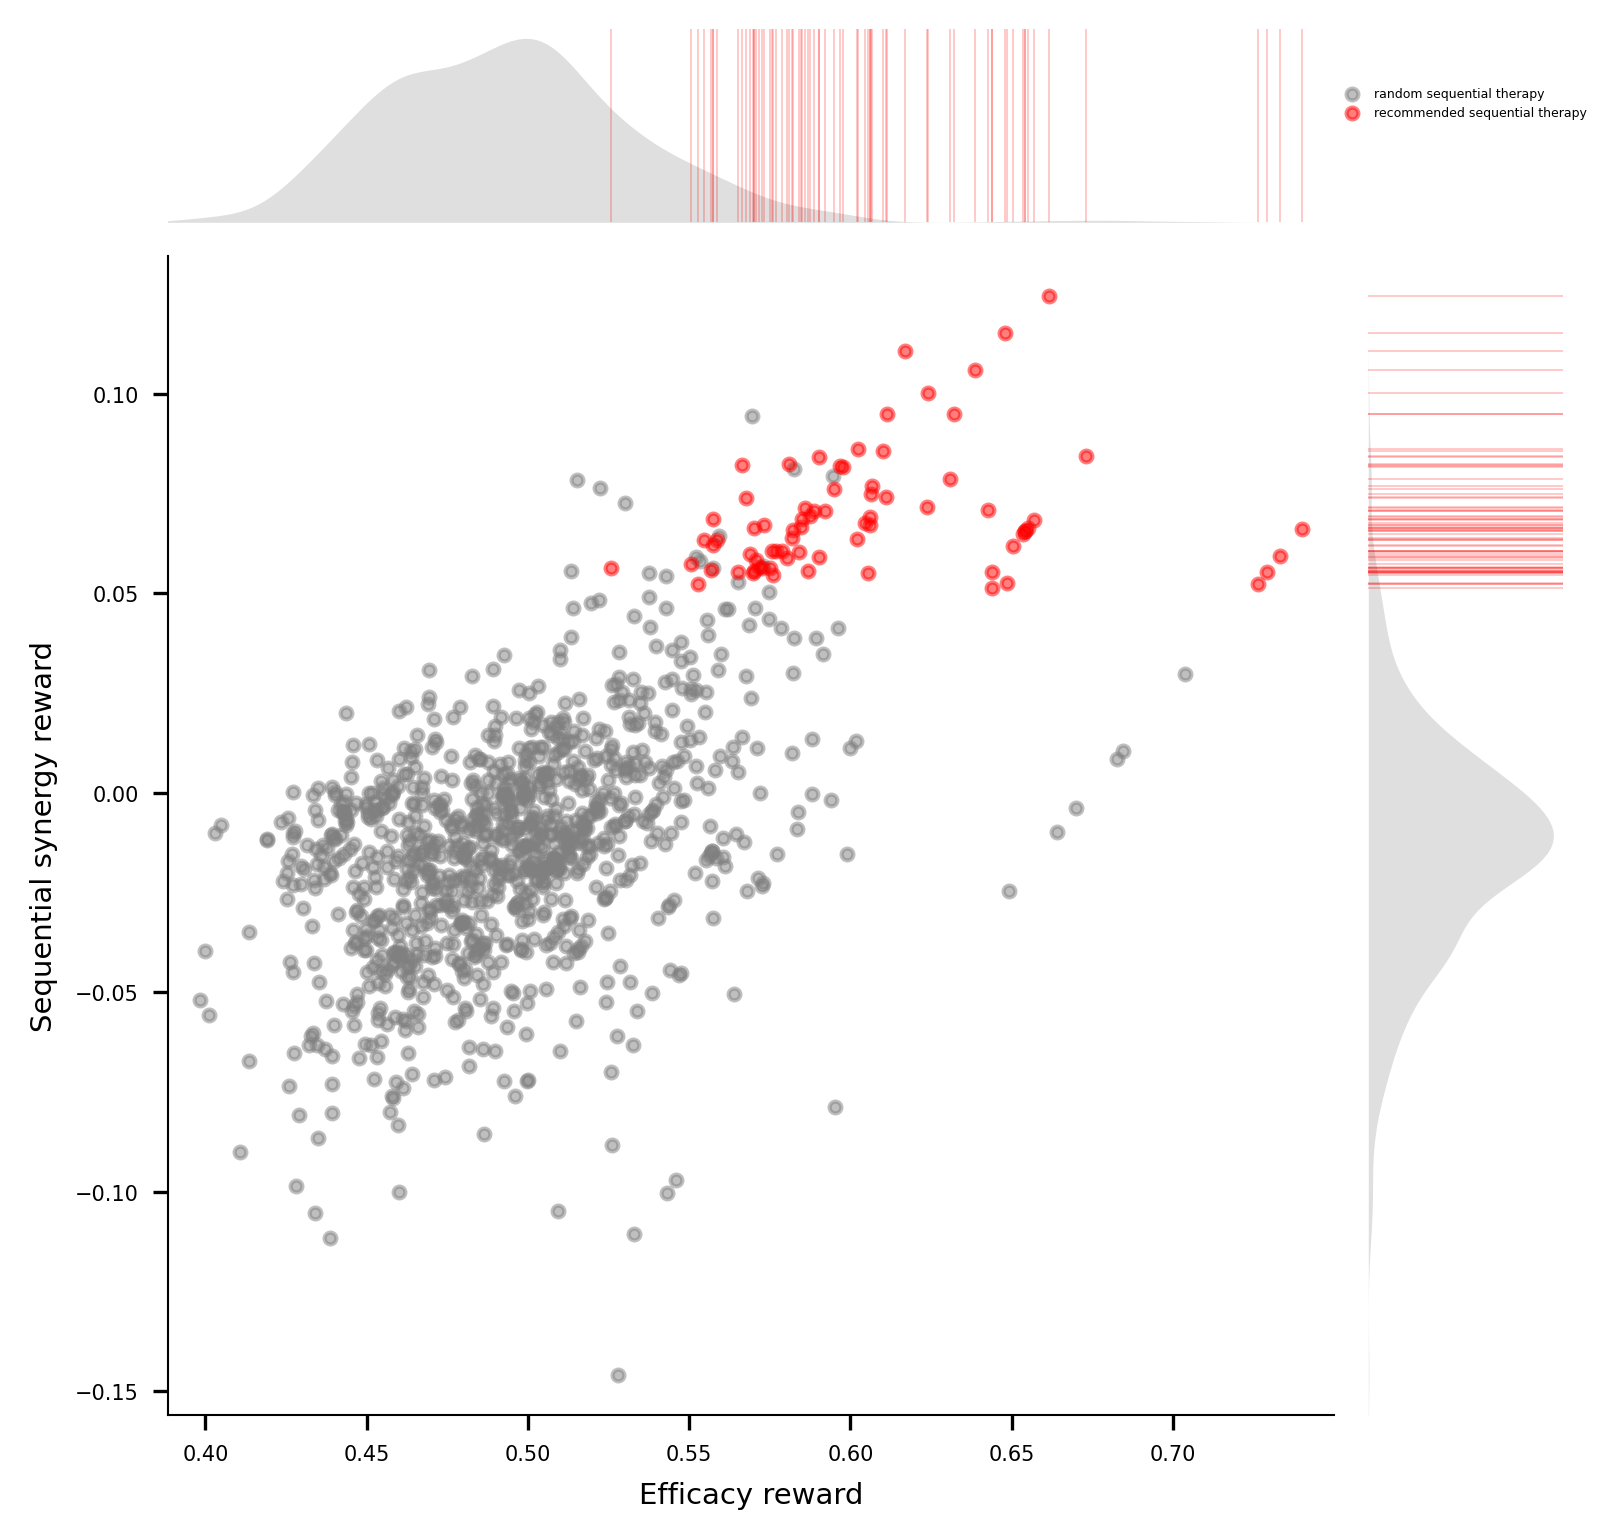

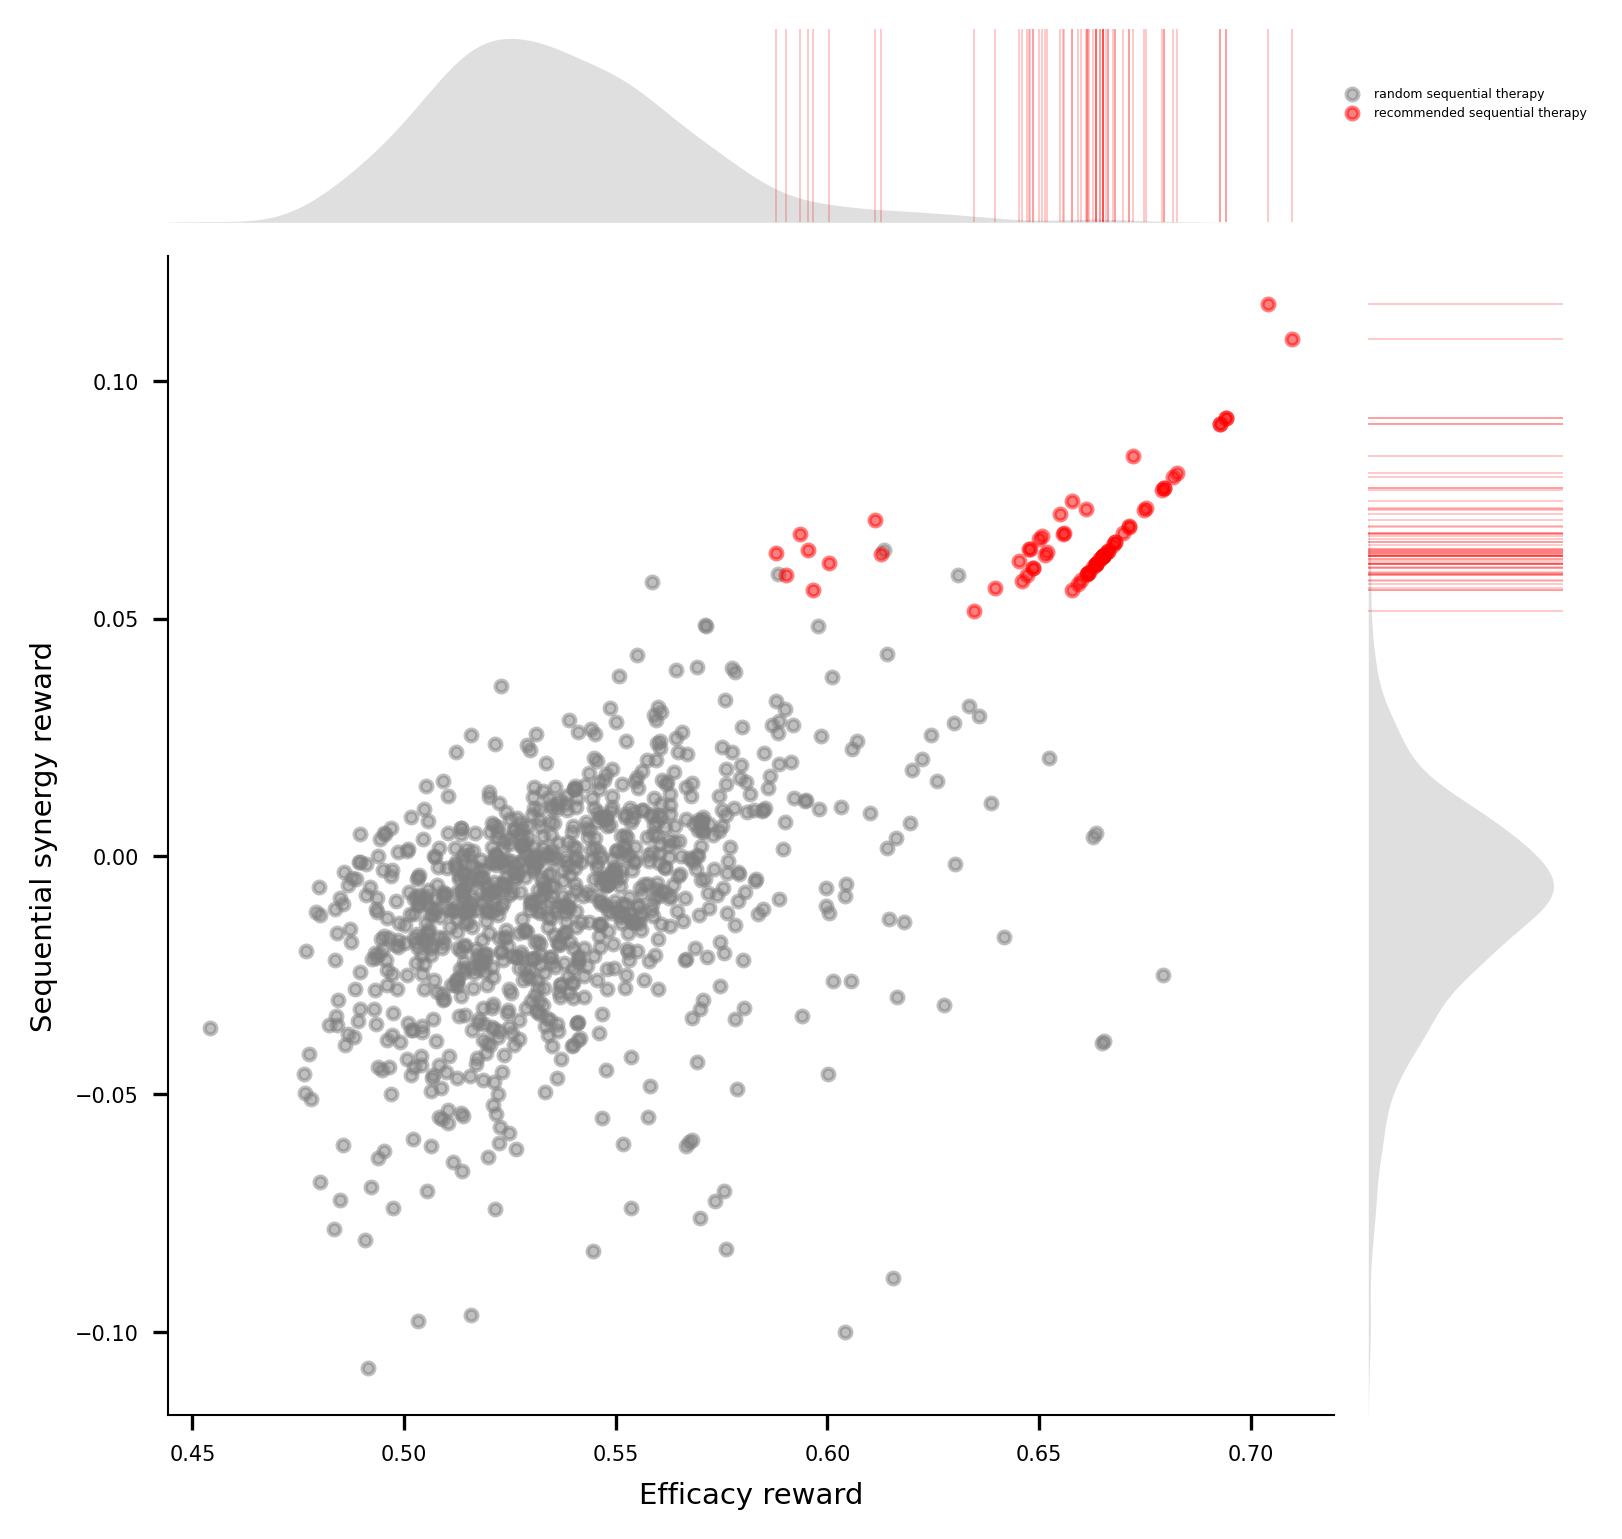

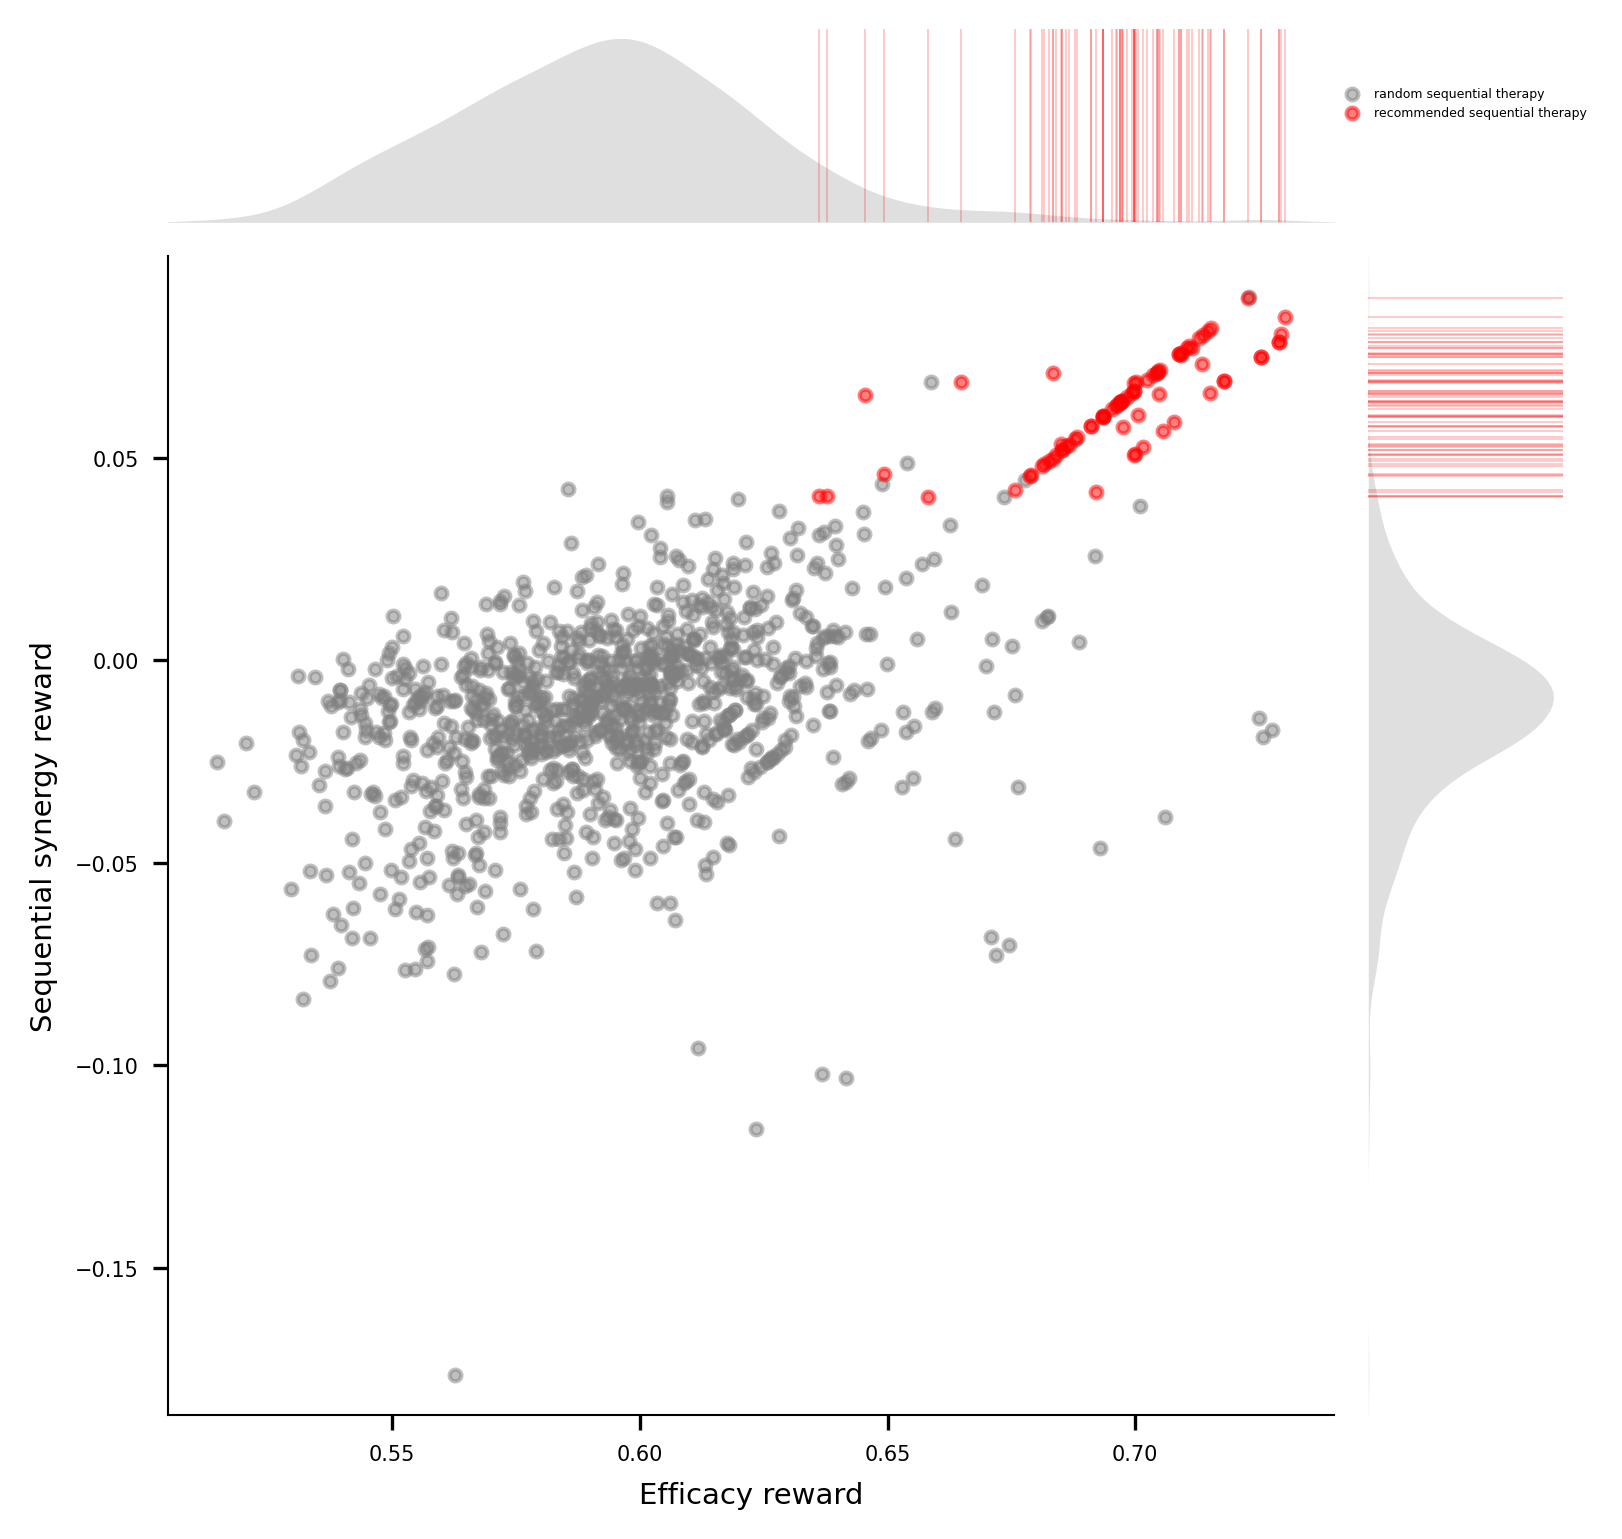

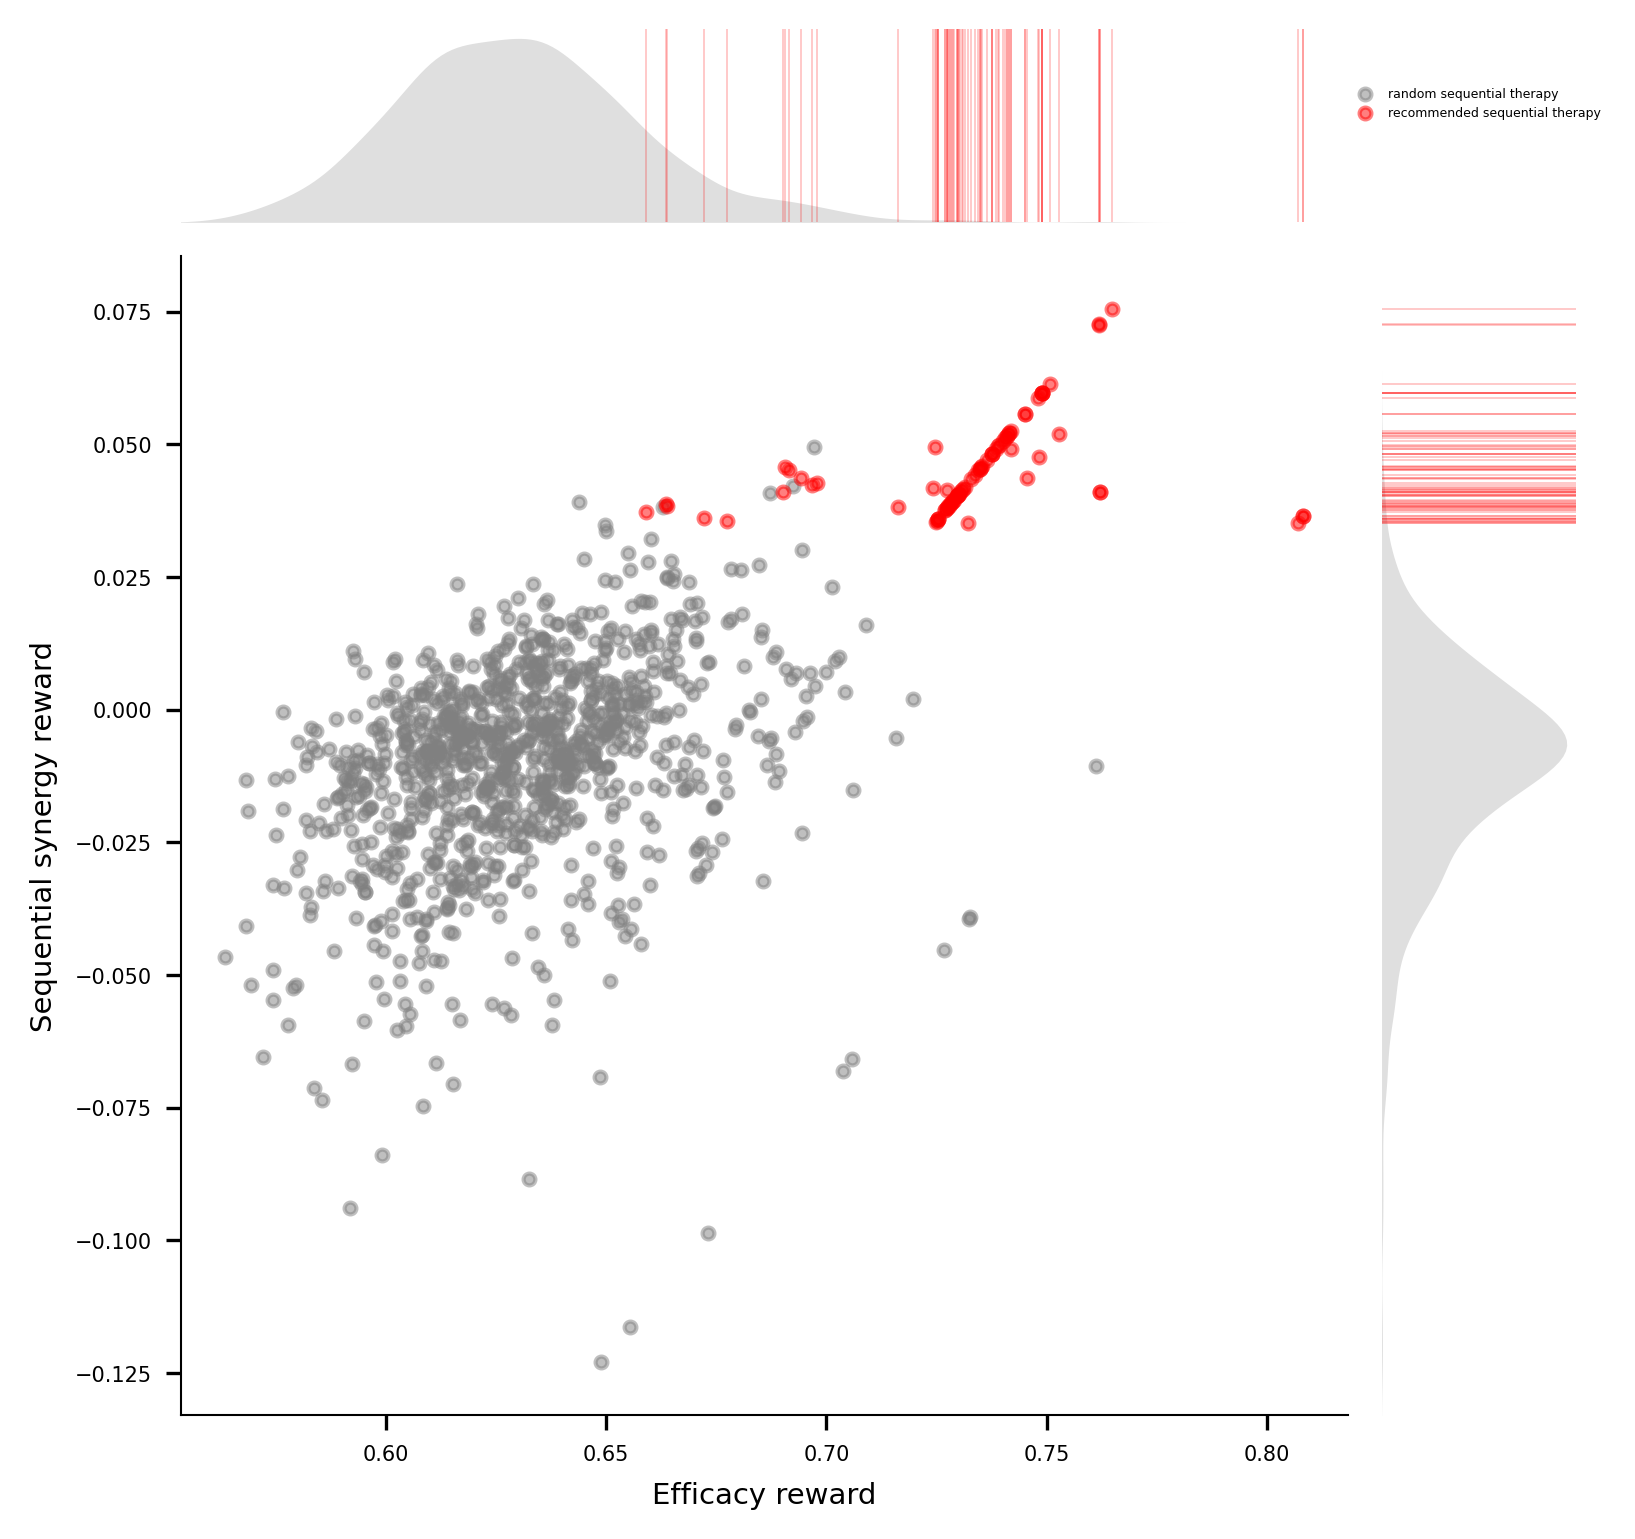

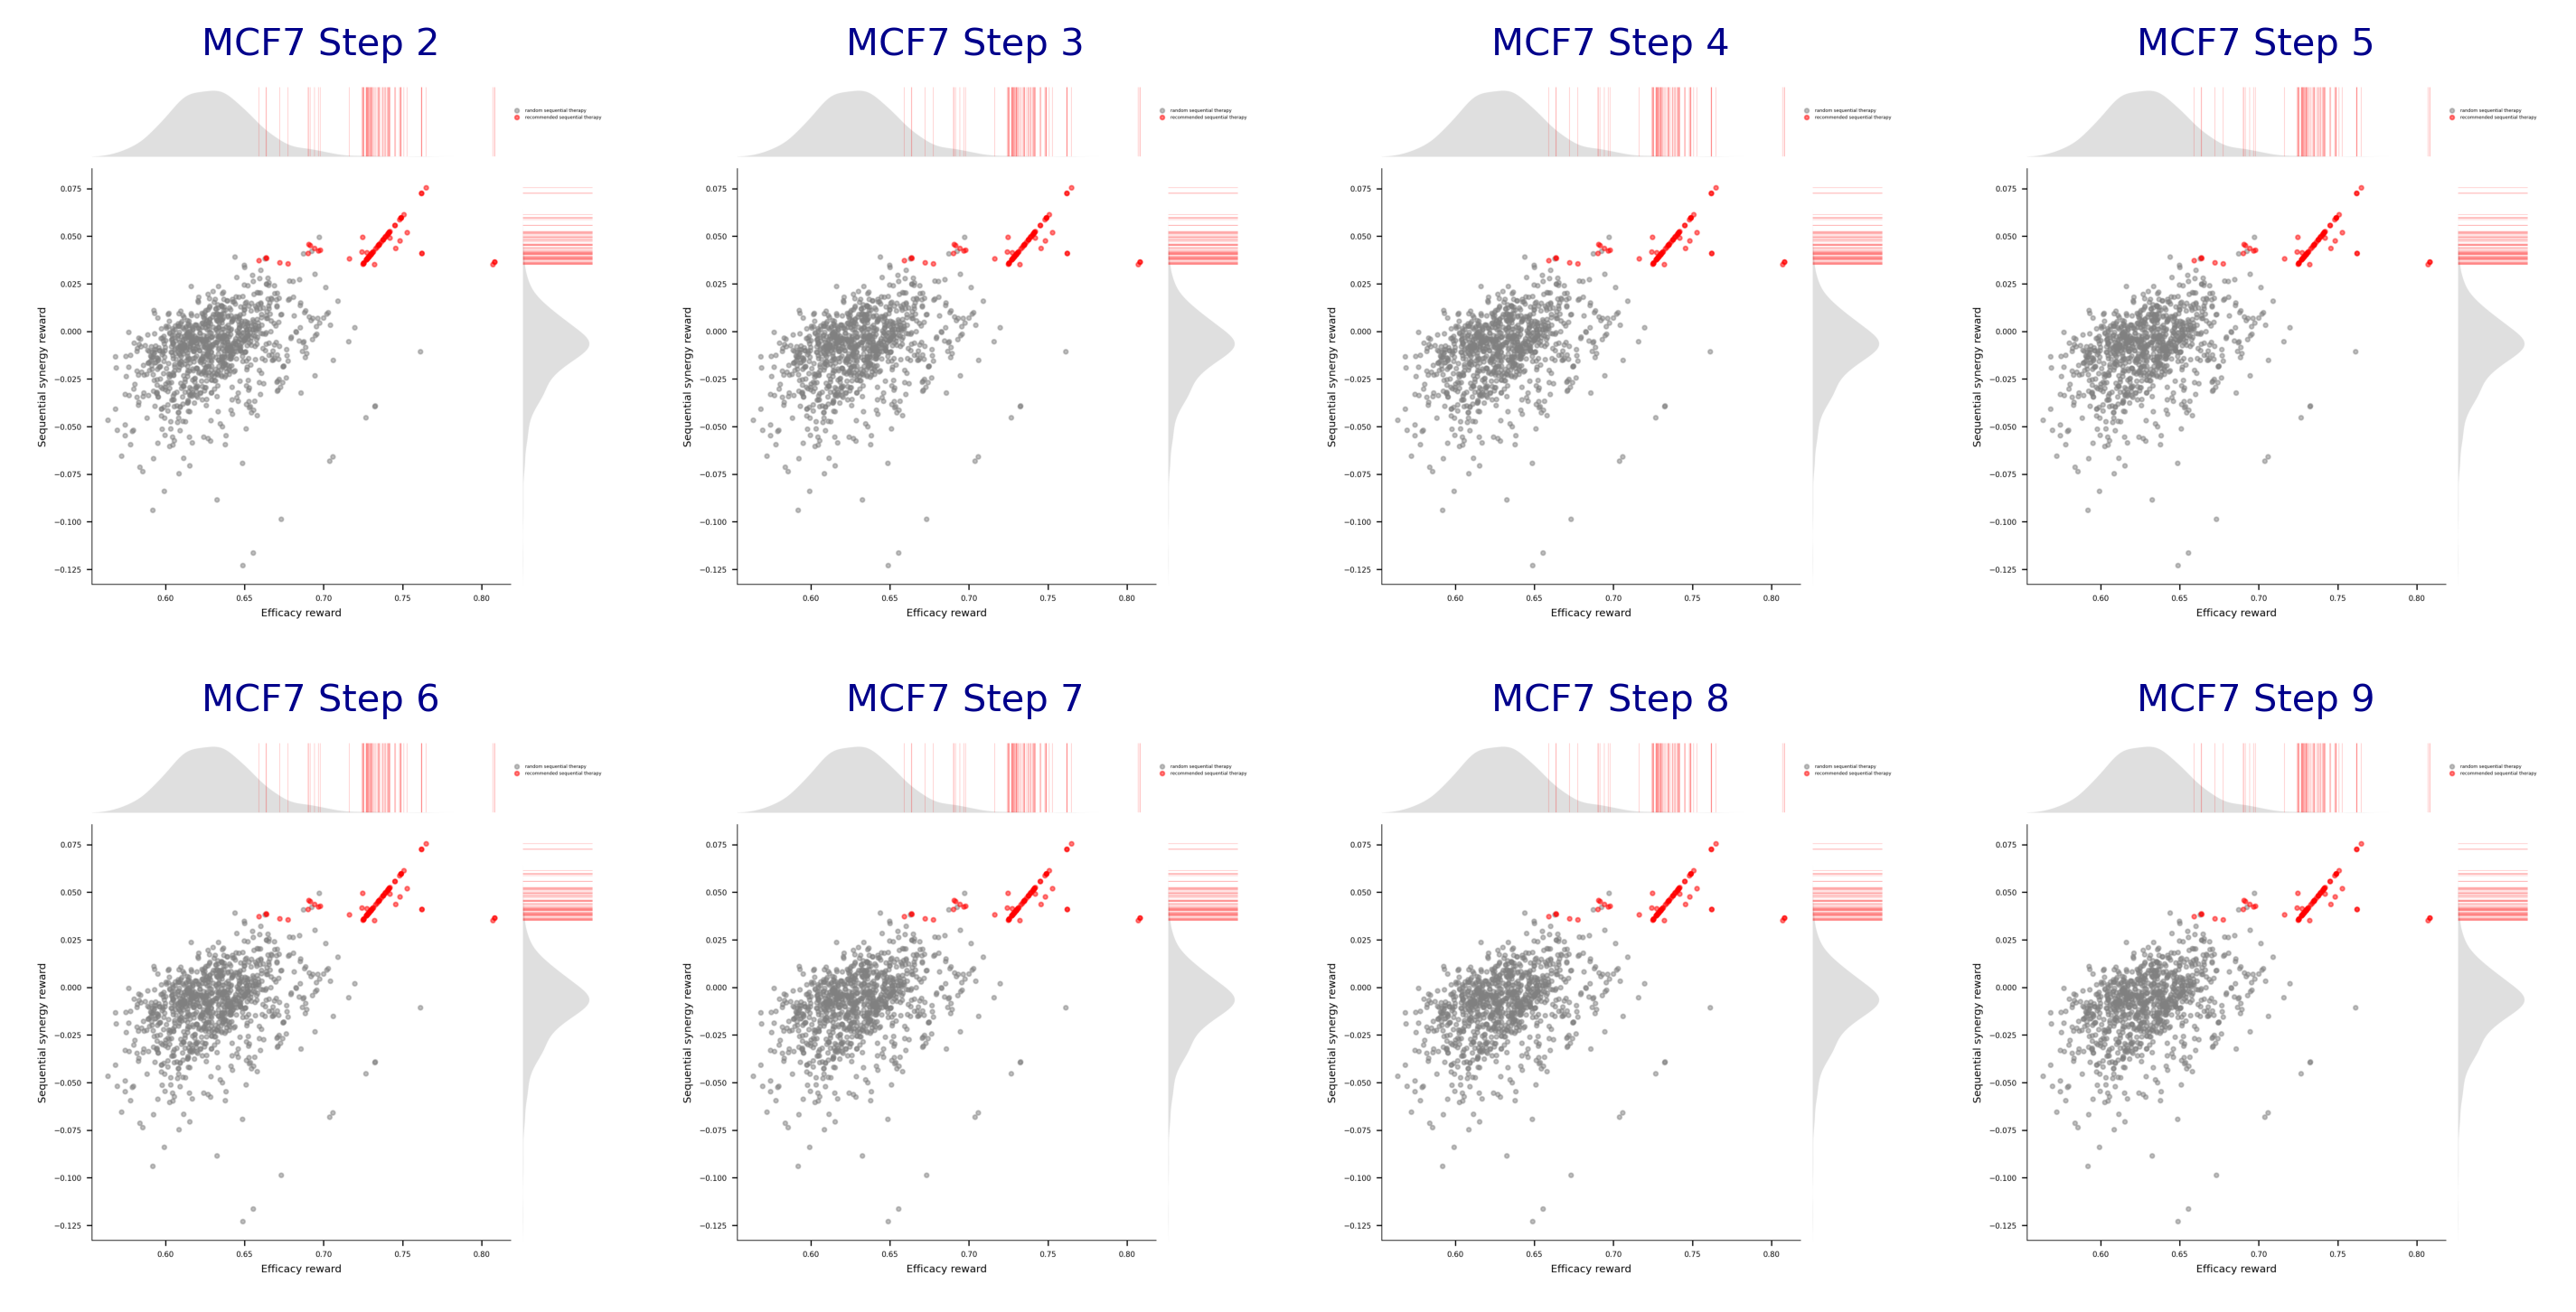

In [4]:
# Create a 2x4 grid of subplots with a specified figure size
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Counter for step numbers
count = 2

# Loop through the grid positions
for i in range(2):  # Iterate over rows
    for j in range(4):  # Iterate over columns
        # Load the image corresponding to the current step
        img = plt.imread(DATA_DIR / f'result_2025/AlphaTherapy/Supplymentary_fig5_step{step_number}.png')
        count += 1
        
        # Display the image in the current subplot
        axs[i, j].imshow(img)
        axs[i, j].axis('off')  # Hide axis for cleaner visualization

        # Define font properties for subplot titles
        font = {'color': 'darkblue', 'size': 10}
        
        # Set the title for the subplot with cell line and step number
        axs[i, j].set_title(f'{cell_line} Step {count-1}', fontdict=font)

# Adjust spacing between subplots to minimize overlap
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()
